# 2018-05-17 - Matching Pursuit
En utilisant un [exemple de Laurent](http://blog.invibe.net/posts/2015-05-22-a-hitchhiker-guide-to-matching-pursuit.html) pour la reconstruction d'image à partir de LogGabor, à partir d'une librarie python de matching pursuit : 

In [1]:
from SparseEdges import SparseEdges
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.N = 4
mp.pe.do_mask=False
mp.pe.MP_alpha=1.
mp.pe.do_whitening = False
mp.pe.figpath, name = './mp', 'mptuto'

On génère une image avec deux filtres LogGabor :

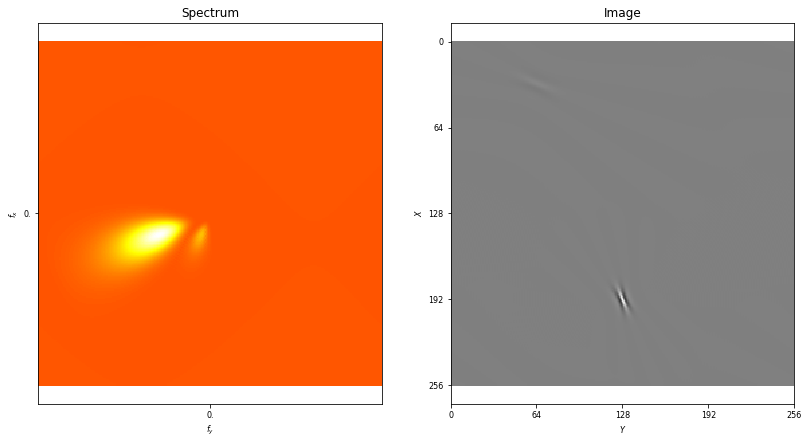

In [2]:
# one
edge_in, C_in= [3*mp.pe.N_X/4, mp.pe.N_Y/2, 2, 2], 42
# the second
edge_bis, C_bis = [mp.pe.N_X/8, mp.pe.N_Y/4, 8, 4], 4.*np.sqrt(2)*np.exp(1j*np.pi/4.)

# filters in Fourier space
FT_lg_in = mp.loggabor(edge_in[0], edge_in[1], sf_0=mp.sf_0[edge_in[3]],
                         B_sf=mp.pe.B_sf, theta= mp.theta[edge_in[2]], B_theta=mp.pe.B_theta)
FT_lg_bis = mp.loggabor(edge_bis[0], edge_bis[1], sf_0=mp.sf_0[edge_bis[3]],
                         B_sf=mp.pe.B_sf, theta= mp.theta[edge_bis[2]], B_theta=mp.pe.B_theta)
# mixing both and shows one
FT_lg_ = C_in *  FT_lg_in + C_bis * FT_lg_bis
image = mp.invert(FT_lg_)

_ = mp.show_FT(FT_lg_, axis=True)

Coordinates of the maximum  (192, 128, 2, 2) , true value:  [192.0, 128.0, 2, 2]
Value of the maximum  (41.99999999999932+4.21101828439962e-13j) , true value:  42


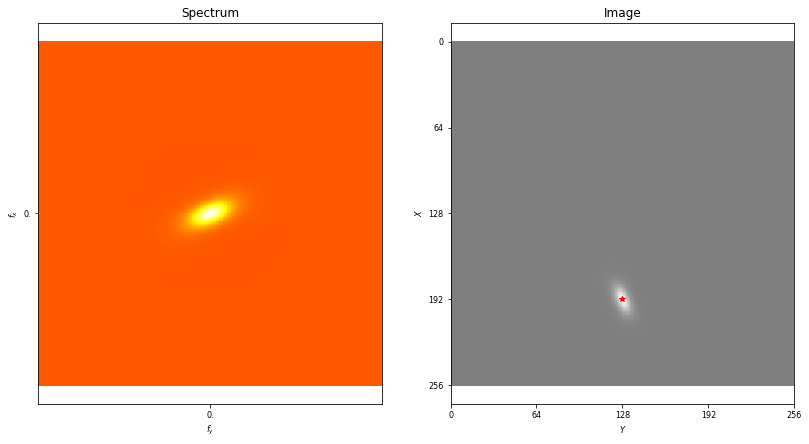

In [3]:
C = mp.linear_pyramid(image)

edge_star = mp.argmax(C)
print('Coordinates of the maximum ', edge_star, ', true value: ', edge_in)
print('Value of the maximum ', C[edge_star], ', true value: ', C_in)

fig, a1, a2 = mp.show_spectrum(np.absolute(C[:, :, edge_star[2], edge_star[3]]), axis=True)
_ = a2.plot([edge_star[1]], [edge_star[0]], 'r*')

Sur notre image générée, c'est l'étape de *matching* et ça donne :

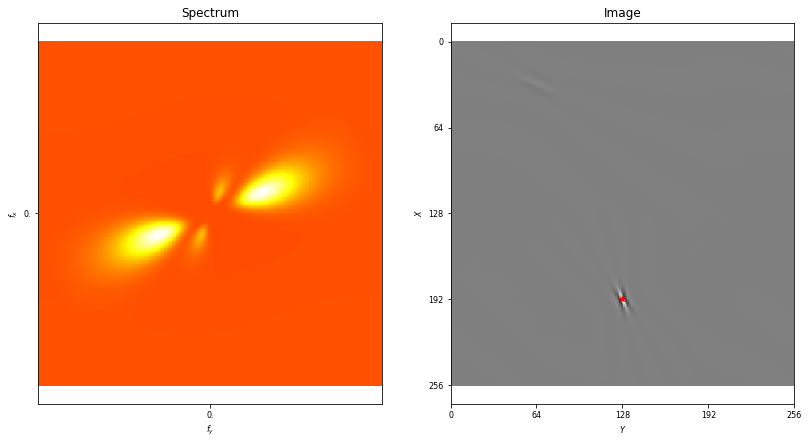

In [4]:
fig, a1, a2 = mp.show_spectrum(image, axis=True)
_ = a2.plot([edge_star[1]], [edge_star[0]], 'r*')

On extrait le gagnant :

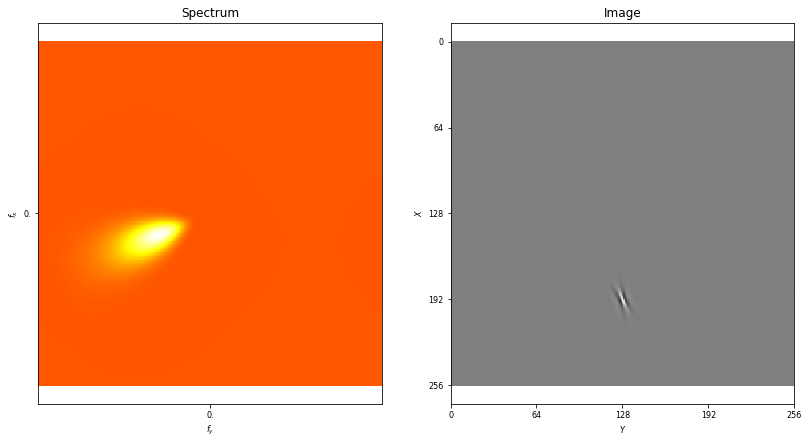

In [5]:
FT_star = mp.loggabor(edge_star[0], edge_star[1], sf_0=mp.sf_0[edge_star[3]],
                         B_sf=mp.pe.B_sf, theta= mp.theta[edge_star[2]], B_theta=mp.pe.B_theta)
im_star = mp.invert(FT_star)
_ = mp.show_FT(FT_star, axis=True)

Maintenant on retire le gagnant de l'image d'origine, c'est l'étape de *pursuit* :

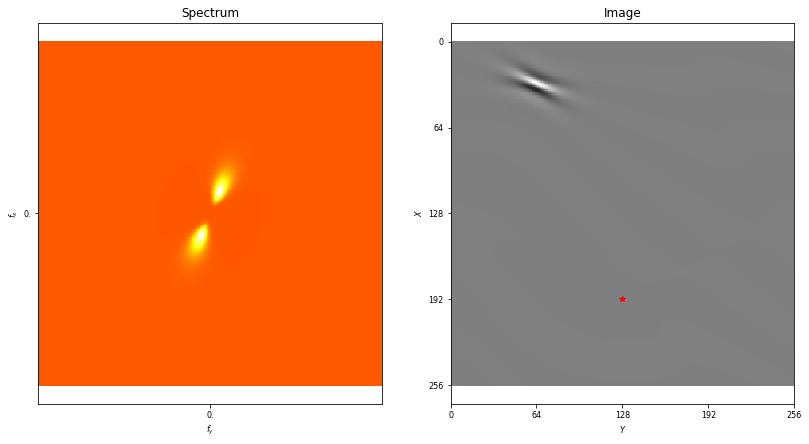

In [6]:
image_res = (image - C[edge_star] * im_star).real 
fig, a1, a2 = mp.show_spectrum(image_res, axis=True)
_ = a2.plot([edge_star[1]], [edge_star[0]], 'r*')

Maintenant on refait une étape de matching :

Coordinates of the maximum  (32, 64, 8, 4) , true value:  [32.0, 64.0, 8, 4]
Value of the maximum  (4+4.000000000000005j) , true value:  (4.000000000000001+4j)


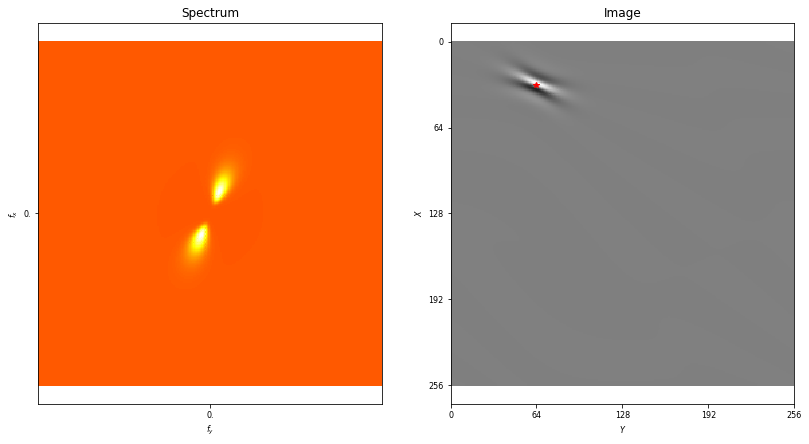

In [7]:
C = mp.linear_pyramid(image_res)

edge_star_bis = mp.argmax(C)
print('Coordinates of the maximum ', edge_star_bis, ', true value: ', edge_bis)
print('Value of the maximum ', C[edge_star_bis], ', true value: ', C_bis)

fig, a1, a2 = mp.show_spectrum(image_res, axis=True)
_ = a2.plot([edge_star_bis[1]], [edge_star_bis[0]], 'r*')

Toutes ces étapes peuvent être executées dans la fonction run_mp :

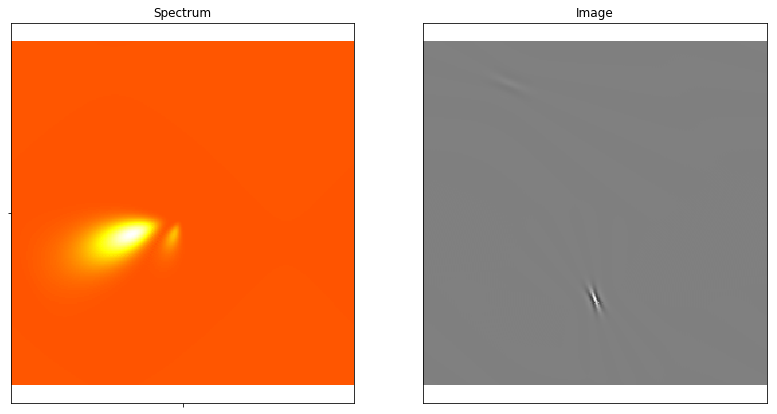

In [8]:
# filters in Fourier space
FT_lg_in = mp.loggabor(edge_in[0], edge_in[1], sf_0=mp.sf_0[edge_in[3]],
                         B_sf=mp.pe.B_sf, theta= mp.theta[edge_in[2]], B_theta=mp.pe.B_theta)
FT_lg_bis = mp.loggabor(edge_bis[0], edge_bis[1], sf_0=mp.sf_0[edge_bis[3]],
                         B_sf=mp.pe.B_sf, theta= mp.theta[edge_bis[2]], B_theta=mp.pe.B_theta)
# mixing both and shows one
FT_lg_ = C_in *  FT_lg_in + C_bis * FT_lg_bis

fig = mp.show_FT(FT_lg_)

In [9]:
image = mp.invert(FT_lg_)
edges, C_res = mp.run_mp(image, verbose=True)

Edge  0 / 4  - Max activity  :  41.99999999999932  phase=  5.744608932107684e-13  deg,  @  (192, 128, 2, 2)
Edge  1 / 4  - Max activity  :  5.656854249492383  phase=  45.00000000000003  deg,  @  (32, 64, 8, 4)
Edge  2 / 4  - Max activity  :  7.97505112859936e-13  phase=  -31.789717833269616  deg,  @  (192, 128, 2, 2)
Edge  3 / 4  - Max activity  :  1.194945776057188e-14  phase=  -2.9473199082355244  deg,  @  (195, 129, 1, 2)


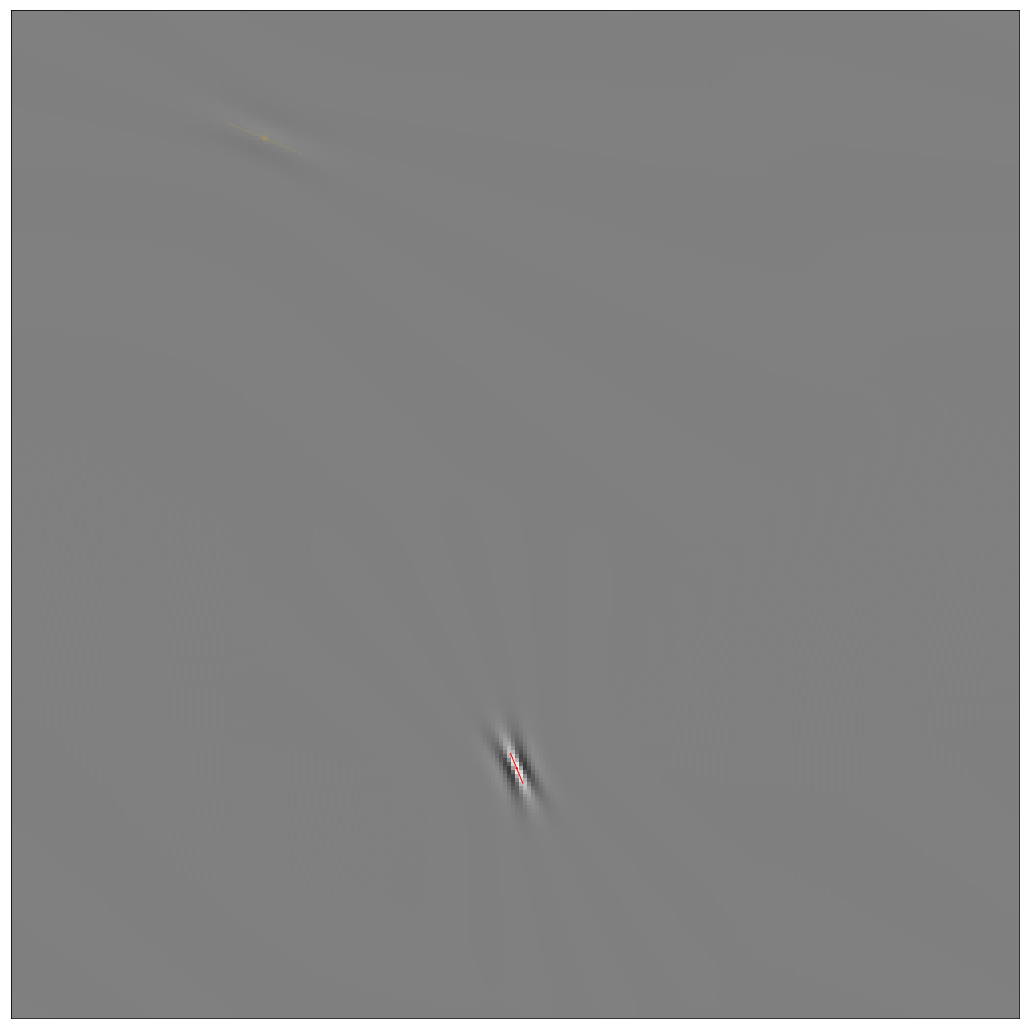

In [10]:
fig, a = mp.show_edges(edges, image=image)

## Matching pursuit avec une image naturelle
Maintenant avec une jolie photo :

In [1]:
from SparseEdges import SparseEdges
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.N = 2048
mp.pe.MP_alpha=1.
mp.pe.figpath, name = './mp', 'mpnaturalimage'

image = mp.imread('tiger.jpg')
mp.init()
image = mp.normalize(image, center=True)

In [ ]:
edges, C_res = mp.run_mp(image, verbose=True)